<p align="Justify"><b>Natural language processing has extensively applied in sentiment analysis as a
 significant challenge. In this scenario, the objective is to determine if the tweets
 shared by customers regarding technology companies that produce and sell
 mobiles, computers, laptops, and similar products express positive sentiment or
 negative sentiment.
 The goal will be to build a system that can accurately classify the new tweets
 sentiments. You can divide the data into train and test. The Evaluation metric you
 should use is the accuracy.</b></p>

**IMPORTING LIBRARIES**

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**READING THE DATASET**

In [57]:
#Reading the dataset
tweets_data=pd.read_csv("/content/tweets.csv")
tweets_data

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...


In [58]:
#display first few rows
tweets_data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [59]:
#general information about the dataset
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [60]:
#display columns in the dataset
tweets_data.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [61]:
#checking any missing values present in the datset
tweets_data.isnull().sum()

,0
id,0
label,0
tweet,0


In [62]:
#checking out the negative comments from dataset
tweets_data[tweets_data['label']==0].head(10)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
6,7,0,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...
13,14,0,I just made another crazy purchase lol my theo...
15,16,0,From #DeepEllum towards #downtown #Dallas. #Bi...


In [63]:
#checking out the positive comments from dataset
tweets_data[tweets_data['label']==1].head(10)

,id,label,tweet
4,5,1,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...
10,11,1,hey #apple when you make a new ipod dont make ...
11,12,1,Ha! Not heavy machinery but it does what I nee...
12,13,1,Contemplating giving in to the iPhone bandwago...
14,15,1,@shaqlockholmes @sam_louise1991 the battery is...
18,19,1,The reason I don't have one. #iphone #suck #ap...
19,20,1,How is the apple store gunna be out of 5C scre...
22,23,1,I've had this new ipod for four days? And this...
23,24,1,when your iPhone screen goes completely black ...


In [64]:
#count the values in the column 'label'
tweets_data['label'].value_counts()

,count
label,
0,5894
1,2026


/tmp/ipython-input-65-1910832015.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tweets_data, x='label', palette='Set2')


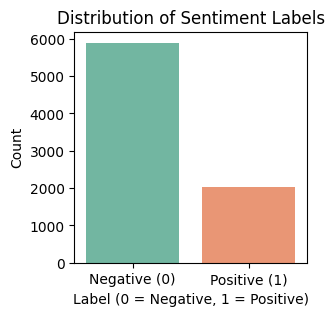

In [65]:
# Countplot  for the column 'label'
plt.figure(figsize=(3,3))
sns.countplot(data=tweets_data, x='label', palette='Set2')

plt.title('Distribution of Sentiment Labels')
plt.xlabel('Label (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative (0)', 'Positive (1)'])
plt.show()


**TEXT PREPROCESSING**

In [66]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
def clean_tweet(text):
    text = text.lower()  # Lowercase

    # Tokenize manually by splitting on spaces
    words = text.split()

    # Remove URLs and mentions/hashtags (check if word starts with @, #, or contains 'http')
    words = [word for word in words if not (word.startswith('@') or word.startswith('#') or 'http' in word or 'www' in word)]

    # Remove punctuation and numbers
    cleaned_words = []
    for word in words:
        word = ''.join(char for char in word if char.isalpha())  # Keep only alphabetic characters
        if word:  # Skip empty strings
            cleaned_words.append(word)

    # Join words back into a string
    return ' '.join(cleaned_words)


**APPLY PREPROCESSING**

In [68]:
# Clean the tweet column
tweets_data['cleaned_tweet'] = tweets_data['tweet'].apply(clean_tweet)

**VECTORIZATION**

In [69]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(tweets_data['cleaned_tweet'])

In [70]:
y =tweets_data['label']

**SPLITTING THE DATA**

In [71]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [72]:
#print the shape of the X_train
print(X_train.shape)

(6336, 5000)


In [73]:
#print the shape of the X_test
print(X_test.shape)

(1584, 5000)


**HANDLING CLASS IMBALANCE**

In [74]:
# Handle class imbalance
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: weights[0], 1: weights[1]}

**MODEL BUILDING**

**1. Machine Learning Models:**

In [75]:
#importing libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [76]:
#creating loop for multiple classifier
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Gaussian Naive Bayes": GaussianNB(),
    "Support Vector Machine":SVC(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced'),
    "XGBoost": XGBClassifier(),
    "K-Nearest Neighbors":KNeighborsClassifier(n_neighbors=5)
}

In [77]:
# Results storage
results = []
trained_models = {}

# Loop through classifiers
for name, model in classifiers.items():
    print(f"\n Training: {name}")

    # Convert to dense only for GaussianNB
    if name == "Gaussian Naive Bayes":
        X_train_input = X_train.toarray()
        X_test_input = X_test.toarray()
    else:
        X_train_input = X_train
        X_test_input = X_test

    # Fit and predict
    model.fit(X_train_input, y_train)
    y_pred = model.predict(X_test_input)

    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f" Accuracy: {acc:.4f}")
    print(f" F1 Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))

    # Store results
    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1 Score': f1
    })

    # Save trained model
    trained_models[name] = model

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)



 Training: Logistic Regression
 Accuracy: 0.8516
 F1 Score: 0.7420
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1179
           1       0.67      0.83      0.74       405

    accuracy                           0.85      1584
   macro avg       0.80      0.85      0.82      1584
weighted avg       0.87      0.85      0.86      1584


 Training: Gaussian Naive Bayes
 Accuracy: 0.5297
 F1 Score: 0.4605
              precision    recall  f1-score   support

           0       0.86      0.44      0.58      1179
           1       0.33      0.79      0.46       405

    accuracy                           0.53      1584
   macro avg       0.59      0.61      0.52      1584
weighted avg       0.72      0.53      0.55      1584


 Training: Support Vector Machine
 Accuracy: 0.8725
 F1 Score: 0.7589
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1179
           1       0.73      

In [78]:
# Display table
print("\n Model Performance Summary:")
print(results_df)


 Model Performance Summary:
                    Model  Accuracy  F1 Score
2  Support Vector Machine  0.872475  0.758950
3           Random Forest  0.855429  0.676096
0     Logistic Regression  0.851641  0.742042
4                 XGBoost  0.851010  0.691099
5     K-Nearest Neighbors  0.745581  0.009828
1    Gaussian Naive Bayes  0.529672  0.460536


In [79]:
#Printing best model,accuracy,f1 score
best_model_row = results_df.iloc[0]
best_model_name = best_model_row['Model']
best_accuracy = best_model_row['Accuracy']
best_f1 = best_model_row['F1 Score']

print(f"\n Best Model: {best_model_name}")
print(f" Accuracy: {best_accuracy:.4f}")
print(f" F1 Score: {best_f1:.4f}")


 Best Model: Support Vector Machine
 Accuracy: 0.8725
 F1 Score: 0.7589


**OBSERVATION**:

We get best accuracy in **Support Vector Machine** with accurcay **87.25**

**HPERPARAMETER TUNING:**

GridSearchCV:

In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear','rbf'],
    'class_weight': ['balanced']
}

svc = SVC()

grid_search = GridSearchCV(estimator=svc,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print(" Best Parameters:", grid_search.best_params_)
print(" Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
 Best Parameters: {'C': 1, 'class_weight': 'balanced', 'kernel': 'rbf'}
 Best Cross-Validation Accuracy: 0.8704213236264406


In [81]:
# Evaluate on test set using best model from GridSearchCV
best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test)


print(" Test Accuracy:", accuracy_score(y_test, y_pred))
print(" Classification Report:\n", classification_report(y_test, y_pred))

 Test Accuracy: 0.8724747474747475
 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1179
           1       0.73      0.79      0.76       405

    accuracy                           0.87      1584
   macro avg       0.83      0.84      0.84      1584
weighted avg       0.88      0.87      0.87      1584



RandomizedSearchCV:

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Define the parameter distributions
param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'class_weight': ['balanced'],

}

# Initialize SVC
svc = SVC()

# Randomized search
random_search = RandomizedSearchCV(estimator=svc,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   scoring='accuracy',
                                   cv=5,
                                   verbose=1,
                                   n_jobs=-1,
                                   random_state=42)

# Fit to training data
random_search.fit(X_train, y_train)

# Output results
print(" Best Parameters:", random_search.best_params_)
print(" Best Cross-Validation Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Best Parameters: {'kernel': 'rbf', 'class_weight': 'balanced', 'C': 1}
 Best Cross-Validation Accuracy: 0.8704213236264406


In [83]:
# Evaluate on test set using best model from RandomizedSearchCV
best_svc = random_search.best_estimator_
y_pred = best_svc.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print(" Test Accuracy:", accuracy_score(y_test, y_pred))
print(" Classification Report:\n", classification_report(y_test, y_pred))

 Test Accuracy: 0.8724747474747475
 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1179
           1       0.73      0.79      0.76       405

    accuracy                           0.87      1584
   macro avg       0.83      0.84      0.84      1584
weighted avg       0.88      0.87      0.87      1584



**OBSERVATION:**

After hyperparameter tuning, there are no frequent changes in accuracy.
Therefore, we selected the SVC model

**PREDICT ON NEW TWEET**

In [84]:
best_model = trained_models[best_model_name]

In [85]:
def predict_sentiment_ml(new_tweet):
    #Clean the tweet
    cleaned = clean_tweet(new_tweet)

    #Vectorize the tweet
    vectorized = vectorizer.transform([cleaned])

    #Predict sentiment
    prediction = best_model.predict(vectorized)[0]

    #result
    sentiment = 'Positive' if prediction == 1 else 'Negative'
    return sentiment

**PREDICTION RESULTS**

Predicted Sentiment: **Negative**

In [86]:
#Access the tweet text for prediction(e.g:Negative)
row = tweets_data.iloc[0]     #first row
print(row['tweet'])           # Access the tweet text
print(row['label'])           # Access the label


#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
0


In [87]:
print("\n=== Test Predictions ===")
tweet = "#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone"
result = predict_sentiment_ml(tweet)
print(f"Tweet: {tweet}\nPredicted Sentiment: {result}😞")


=== Test Predictions ===
Tweet: #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
Predicted Sentiment: Negative😞


Predicted Sentiment: **Positive**

In [88]:
#Access the tweet text for prediction(e.g:positive)
row1 = tweets_data.iloc[5]     # Fifth row
print(row1['tweet'])           # Access the tweet text
print(row1['label'])           # Access the label

iPhone software update fucked up my phone big time Stupid iPhones
1


In [89]:
print("\n=== Test Predictions ===")
tweet = "iPhone software update fucked up my phone big time Stupid iPhones"
result = predict_sentiment_ml(tweet)
print(f"Tweet: {tweet}\nPredicted Sentiment: {result}😊")


=== Test Predictions ===
Tweet: iPhone software update fucked up my phone big time Stupid iPhones
Predicted Sentiment: Positive😊


**2. Deep learning models:**

In [90]:
#convert cleaned tweets to sequences of word indexes
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#tokenize +pad

tokenizer = Tokenizer(num_words=10000, oov_token="[OOV]")
tokenizer.fit_on_texts(tweets_data['cleaned_tweet'])

sequences = tokenizer.texts_to_sequences(tweets_data['cleaned_tweet'])
X_seq = pad_sequences(sequences, maxlen=100)

In [91]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y, test_size=0.2, stratify=y, random_state=42)

In [92]:
#importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM,GRU,SimpleRNN,Conv1D,Dropout,GlobalMaxPooling1D, Dense, Dropout

LSTM:

In [93]:
#Building LSTM model

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model_lstm.add(LSTM(64, return_sequences=True))
model_lstm.add(LSTM(128, dropout=0.2))
model_lstm.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [94]:
#compile the model
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [95]:
#fit the model
model_lstm.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=32,
    class_weight=class_weights
)


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7624 - loss: 0.4840 - val_accuracy: 0.8281 - val_loss: 0.3657
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9059 - loss: 0.2440 - val_accuracy: 0.8312 - val_loss: 0.4146
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9524 - loss: 0.1471 - val_accuracy: 0.8502 - val_loss: 0.4125
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9632 - loss: 0.1028 - val_accuracy: 0.8297 - val_loss: 0.4829
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9723 - loss: 0.0823 - val_accuracy: 0.8123 - val_loss: 0.6265
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9742 - loss: 0.0718 - val_accuracy: 0.8344 - val_loss: 0.6114
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9864 - loss: 0.0490 - val_accuracy: 0.8218 - val_loss: 0.7363
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9921 - loss: 0.0284 - val_accu

In [96]:
# Evaluate the model
loss, acc =model_lstm.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8290 - loss: 0.8262
Test Accuracy: 0.8321


GRU:

In [97]:
#Building GRU model
model_gru = Sequential()
model_gru.add(Embedding(input_dim=10000, output_dim=128, input_length=100))

model_gru.add(GRU(64, return_sequences=True))
model_gru.add(GRU(128, dropout=0.2))

model_gru.add(Dense(1, activation='sigmoid'))


In [98]:
#compile the model
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [99]:
#fit the model
model_gru.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=32,
    class_weight=class_weights
)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7685 - loss: 0.4779 - val_accuracy: 0.8044 - val_loss: 0.4428
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8953 - loss: 0.2363 - val_accuracy: 0.8218 - val_loss: 0.4078
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9538 - loss: 0.1311 - val_accuracy: 0.8155 - val_loss: 0.4603
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9713 - loss: 0.0867 - val_accuracy: 0.8391 - val_loss: 0.5351
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9787 - loss: 0.0697 - val_accuracy: 0.8297 - val_loss: 0.5907
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9848 - loss: 0.0461 - val_accuracy: 0.8233 - val_loss: 0.7739
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9908 - loss: 0.0270 - val_accuracy: 0.8375 - val_loss: 0.7570
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9954 - loss: 0.0193 - val_accu

In [100]:
# Evaluate the model
loss, acc =model_gru.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8394 - loss: 0.9720
Test Accuracy: 0.8390


Conv1D:

In [101]:
#Building the Conv1D
model_Conv1D = Sequential()
model_Conv1D.add(Embedding(input_dim = 10000,output_dim = 128,input_length=100))

model_Conv1D.add(Conv1D(64, kernel_size=3, activation='relu'))
model_Conv1D.add(Dropout(0.2))

model_Conv1D.add(Conv1D(64, kernel_size=3, activation='relu'))
model_Conv1D.add(Dropout(0.2))

model_Conv1D.add(GlobalMaxPooling1D())
model_Conv1D.add(Dense(128, activation='relu'))
model_Conv1D.add(Dense(1, activation='sigmoid'))

In [102]:
#compile the model
model_Conv1D.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [103]:
#fit the model
model_Conv1D.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=32,
    class_weight=class_weights
)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.6357 - loss: 0.5284 - val_accuracy: 0.7760 - val_loss: 0.5071
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9041 - loss: 0.2519 - val_accuracy: 0.7713 - val_loss: 0.5849
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9416 - loss: 0.1588 - val_accuracy: 0.7981 - val_loss: 0.5752
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9671 - loss: 0.1065 - val_accuracy: 0.7950 - val_loss: 0.7198
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9766 - loss: 0.0747 - val_accuracy: 0.8249 - val_loss: 0.5570
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9893 - loss: 0.0445 - val_accuracy: 0.8107 - val_loss: 0.6543
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9922 - loss: 0.0435 - val_accuracy: 0.7965 - val_loss: 0.8017
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9946 - loss: 0.0416 - val_accuracy: 0

In [104]:
# Evaluate the model
loss, acc =model_Conv1D.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8382 - loss: 0.7242
Test Accuracy: 0.8409


SimpleRNN:

In [105]:
#Building the RNN model
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=10000, output_dim=100, input_length=100))
model_rnn.add(SimpleRNN(128, dropout=0.2))
model_rnn.add(Dense(1, activation='sigmoid'))

In [106]:
#compile the model
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [107]:
#fit the model
model_rnn.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=32,
    class_weight=class_weights
)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.7444 - loss: 0.4896 - val_accuracy: 0.8107 - val_loss: 0.4413
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9025 - loss: 0.2420 - val_accuracy: 0.8281 - val_loss: 0.3807
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9695 - loss: 0.0995 - val_accuracy: 0.8249 - val_loss: 0.4432
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9931 - loss: 0.0304 - val_accuracy: 0.8218 - val_loss: 0.6462
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9683 - loss: 0.0903 - val_accuracy: 0.8139 - val_loss: 0.5225
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9854 - loss: 0.0506 - val_accuracy: 0.8438 - val_loss: 0.4348
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9806 - loss: 0.0502 - val_accuracy: 0.8344 - val_loss: 0.5566
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9966 - loss: 0.0154 - val_accu

In [108]:
# Evaluate the model
loss, acc =model_rnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8613 - loss: 0.5972
Test Accuracy: 0.8573


**PREDICTION:We get greater accuracy in SimpleRNN moel.So choose RNN model for prediction**

**PREDICTION ON NEW TWEET**

In [109]:
#Preprocessing

def predict_sentiment_dl(new_tweet, model, tokenizer, max_len=100):
    # Clean the tweet
    cleaned = clean_tweet(new_tweet)

    # Tokenize and pad
    sequence = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(sequence, maxlen=max_len)

    # Predict probability
    prob = model_rnn.predict(padded)[0][0]

    # Binary prediction
    prediction = 1 if prob > 0.5 else 0

    # result
    sentiment = 'Positive' if prediction == 1 else 'Negative'
    return sentiment

**PREDICTION RESULT**

Predicted Sentiment: **Negative**

In [110]:
#Access the tweet text for prediction(e.g:Negative)
row = tweets_data.iloc[9]     #9th row
print(row['tweet'])           # Access the tweet text
print(row['label'])           # Access the label

Photo: #fun #selfie #pool #water #sony #camera #picoftheday #sun #instagood #boy #cute #outdoor... http://tmblr.co/ZAjC0n1ms_Gp8
0


In [111]:
print("\n=== Test Predictions ===")
tweet = "Photo: #fun #selfie #pool #water #sony #camera #picoftheday #sun #instagood #boy #cute #outdoor... http://tmblr.co/ZAjC0n1ms_Gp8"
result = predict_sentiment_dl(tweet,model_rnn,tokenizer)
print(f"Tweet: {tweet}\nPredicted Sentiment: {result}😞")


=== Test Predictions ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
Tweet: Photo: #fun #selfie #pool #water #sony #camera #picoftheday #sun #instagood #boy #cute #outdoor... http://tmblr.co/ZAjC0n1ms_Gp8
Predicted Sentiment: Negative😞


Predicted Sentiment: **Positive**

In [112]:
#Access the tweet text for prediction(e.g:Negative)
row = tweets_data.iloc[12]     #12th row
print(row['tweet'])           # Access the tweet text
print(row['label'])           # Access the label

Contemplating giving in to the iPhone bandwagon simply because #Cellcom has no new Androids #depressing #IDontWantTo
1


In [113]:
print("\n=== Test Predictions ===")
tweet = "Contemplating giving in to the iPhone bandwagon simply because #Cellcom has no new Androids #depressing #IDontWantTo"
result = predict_sentiment_dl(tweet,model_rnn,tokenizer)
print(f"Tweet: {tweet}\nPredicted Sentiment: {result}😊")


=== Test Predictions ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Tweet: Contemplating giving in to the iPhone bandwagon simply because #Cellcom has no new Androids #depressing #IDontWantTo
Predicted Sentiment: Positive😊
